In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
plt.style.use('seaborn')

In [16]:
x=pd.read_csv('Linear_X_Train.csv')
y=pd.read_csv('Linear_Y_Train.csv')

print(x.head())
print(y.head())

          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043
           y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187


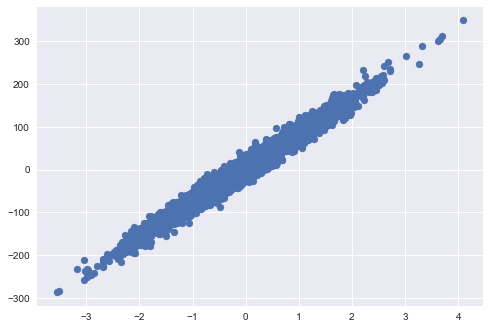

In [17]:
x=x.values
y=y.values

plt.scatter(x,y)

In [18]:
def hypotheses(x,theta):
    return (theta[0]+theta[1]*x)

def calculategradient(x,y,theta):
    m=x.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        X=x[i]
        ycap=hypotheses(X,theta)
        yog=y[i]
        grad[0]+=(ycap-yog)
        grad[1]+=(ycap-yog)*X
    return grad/m
def gradientDescent(x,y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    for i in range(max_steps):
        grad=calculategradient(x,y,theta)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        e=error(x,y,theta)
        error_list.append(e)
    return theta,error_list

def error(x,y,theta):
    m=x.shape[0]
    total_error=0.0
    for i in range(m):
        ycap=hypotheses(x[i],theta)
        total_error+=(ycap-y[i])**2
    return total_error/m


In [19]:
theta,error_list=gradientDescent(x,y)
print(theta,error_list)

[ 3.72687896 80.54086647] [array([5382.10116306]), array([4411.49946152]), array([3622.60756627]), array([2981.36244807]), array([2460.09492819]), array([2036.32790862]), array([1691.80078718]), array([1411.67742971]), array([1183.90311642]), array([998.68240386]), array([848.05513558]), array([725.55212733]), array([625.91553452]), array([544.87173451]), array([478.94684832]), array([425.31688589]), array([381.68600791]), array([346.18762175]), array([317.30402305]), array([293.8011006]), array([274.67527734]), array([259.1103913]), array([246.44265199]), array([236.13215782]), array([227.7397446]), array([220.90816592]), array([215.34679392]), array([210.819181]), array([207.13294679]), array([204.13155518]), array([201.6876277]), array([199.69750573]), array([198.07682823]), array([196.75693483]), array([195.6819403]), array([194.80635471]), array([194.09314753]), array([193.51217265]), array([193.03888696]), array([192.65330781]), array([192.33916462]), array([192.08320849]), array

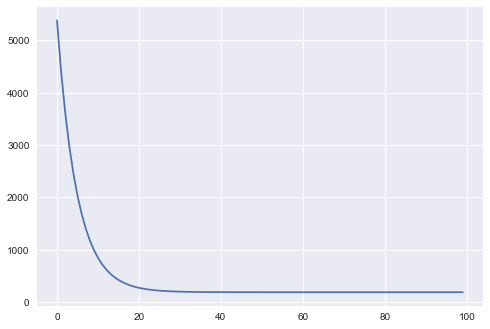

In [20]:
plt.plot(error_list)
plt.show()

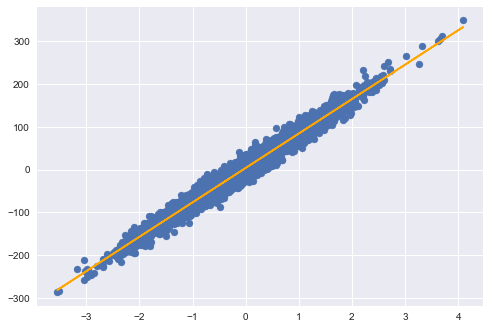

In [21]:
#marking predictions

ycap=hypotheses(x,theta)
plt.scatter(x,y)
plt.plot(x,ycap,color='orange')
plt.show()

In [22]:
xtest=pd.read_csv("Linear_X_Test.csv").values
ytest=hypotheses(xtest,theta)
ytest.shape

(1250, 1)

In [23]:
df=pd.DataFrame(data=ytest,columns=['y'])
df.head()

,y
0,-147.524391
1,-66.265705
2,-200.056206
3,226.036217
4,51.326541


In [26]:
df.to_csv("out.csv",index=False)